# Bayesian Model Comparison

Bayesian model comparison arises when we cannot condition on which model generated our data, leaving this model choice uncertain, so we quantify our uncertainty about competing models by measuring how well they predict observed data while accounting for the uncertainty inherent in their parameter spaces reflected by how broadly their priors spread probability.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide28.png)

# Key Formula

When we cannot condition on which model $M_1$ or $M_2$ generated our data, we quantify our uncertainty about model choice by calculating **posterior odds**. These represent our updated uncertainty about competing models after observing the data:

$$ \frac{P(M_1|D)}{P(M_2|D)} = \frac{P(D|M_1)P(M_1)}{P(D|M_2)P(M_2)} $$

This can be decomposed as:

$$ \text{Posterior Odds} = \text{Bayes Factor} \times \text{Prior Odds} $$

Where:
- $P(M_1|D)$ and $P(M_2|D)$ are our **posterior uncertainties** about models $M_1$ and $M_2$ after conditioning on the observed data
- $\frac{P(D|M_1)}{P(D|M_2)}$ is the **Bayes factor**, which quantifies how the data updates our uncertainty about which model is more plausible
- $P(M_1)$ and $P(M_2)$ are our **prior uncertainties** about each model before conditioning on any data, representing what we cannot know a priori about model choice

# Technical Details

## Understanding the Bayes Factor

The **Bayes Factor** quantifies how the data updates our uncertainty about competing models when we cannot condition on which model generated the observations:

$$
\text{BF}_{21} = \frac{L(\text{M}_2|\text{D})}{L(\text{M}_1|\text{D})} ={\frac {\int \Pr(\theta_{2}|M_{2})\Pr(D|\theta_{2},M_{2})\,d\theta _{2}}{\int \Pr(\theta_{1}|M_{1})\Pr(D|\theta_{1},M_{1})\,d\theta _{1}}}
$$

**Interpreting uncertainty updates**: 
- $\text{BF}_{21} > 1$: Data reduces our uncertainty by favoring model $M_2$ over $M_1$
- $\text{BF}_{21} < 1$: Data reduces our uncertainty by favoring model $M_1$ over $M_2$
- $\text{BF}_{21} = 1$: Data provides no information to reduce our uncertainty between models

## From Uncertainty Quantification to Model Selection

Since we cannot condition on the true model a priori, the Bayes factor updates our prior uncertainty through:

$$
\frac{P(M_2|D)}{P(M_1|D)} = \text{BF}_{21} \times \frac{P(M_2)}{P(M_1)}
$$

This shows how conditioning on data transforms our uncertainty:
$$
\text{Posterior Uncertainty} = \text{Evidence Update} \times \text{Prior Uncertainty}
$$

## Quantifying Prior Model Uncertainty

**Equal uncertainty** (no initial preference): Set $P(M_1) = P(M_2) = 0.5$
$$
\frac{P(M_2|D)}{P(M_1|D)} = \text{BF}_{21}
$$
*Our posterior uncertainty is determined entirely by the data.*

**Unequal uncertainty** (one model initially preferred):
$$
\frac{P(M_2|D)}{P(M_1|D)} = \text{BF}_{21} \times \frac{P(M_2)}{P(M_1)}
$$
*The data updates our initial uncertainty about model choice.*

## Computing the Marginal Likelihood

The integral $\int \Pr(\theta|M)\Pr(D|\theta,M)\,d\theta$ represents the **marginal likelihood** - the probability of observing the data under a model when we cannot condition on specific parameter values and must average over all possibilities.

### Simple Case: When We Can Condition Analytically
When the prior and likelihood are conjugate (like the normal distributions in our Bayesian normal mean and multivariate normal mean models), we can analytically integrate out the parameter uncertainty, yielding closed-form marginal likelihoods.

### Complex Case: When Parameter Uncertainty Cannot Be Resolved Analytically

When priors and likelihoods are not conjugate (as in our pleiotropy example), we cannot analytically resolve the parameter uncertainty in $\int \Pr(\theta|M)\Pr(D|\theta,M)\,d\theta$. This reflects the fundamental challenge: when we cannot condition on parameters, we must numerically integrate over all possible values, which becomes computationally prohibitive for high-dimensional parameter spaces in real GWAS datasets.

Several approximation methods have been developed to handle this uncertainty:
- **Laplace approximation** (assumes uncertainty is concentrated around the posterior mode)
- **MCMC-based methods** like Chib's method or thermodynamic integration (sample from the uncertainty distribution)
- **Nested Sampling** (systematically explores the uncertainty landscape)

The choice reflects a trade-off between computational feasibility and how thoroughly we can characterize the parameter uncertainty in our model comparison.

# Related Topics

- [OLS](https://gaow.github.io/statgen-prerequisites/ordinary_least_squares.html)
- [summary statistics](https://gaow.github.io/statgen-prerequisites/summary_statistics.html)
- [linkage disequilibrium](https://gaow.github.io/statgen-prerequisites/linkage_disequilibrium.html)
- [marginal and joint effects](https://gaow.github.io/statgen-prerequisites/marginal_joint_effects.html)
- [Bayes factor](https://gaow.github.io/statgen-prerequisites/Bayes_factor.html)
- [Bayes rule](https://gaow.github.io/statgen-prerequisites/Bayes_rule.html)
- [Bayesian normal mean model](https://gaow.github.io/statgen-prerequisites/Bayesian_normal_mean_model.html)
- [Bayesian multivariate normal mean model](https://gaow.github.io/statgen-prerequisites/Bayesian_multivariate_normal_mean_model.html)
- [Bayesian mixture model](https://gaow.github.io/statgen-prerequisites/Bayesian_mixture_model.html)

# Example

## Example 1 -- Fine Mapping

Remember when we discussed marginal versus joint effects? We saw how correlated predictors create misleading associations, and our solution was simple: fit a joint model with all predictors. This approach treated effects as fixed parameters, assuming we could condition on everything simultaneously.

But this assumption is not realistic - we cannot condition on everything. In genomics, when you have hundreds of correlated variants in linkage disequilibrium (LD), we cannot condition on all joint effects because the models become unstable due to overfitting, forcing us to acknowledge our conditioning limitations.

This creates the classic **fine-mapping** problem - because we cannot condition on everything, we face fundamental uncertainty about which variant is truly causal. Variants in LD "travel together" through generations, leaving us uncertain about causality even though all variants show association.

Since we cannot condition on everything, we must treat causal variant identity as uncertain. Bayesian model comparison provides a principled framework for quantifying our uncertainty about different causal hypotheses, systematically evaluating which single variant is most likely causal while properly accounting for this inherent uncertainty arising from our conditioning limitations.

Let's define our competing models:

- **M0**: Null model - none of the variants are causal
- **M1**: Variant 1 is the causal variant  
- **M2**: Variant 2 is the causal variant
- **M3**: Variant 3 is the causal variant

### Generation of Simulated Data

In [1]:
# Clear the environment and set seed for reproducibility
rm(list = ls())
set.seed(9) 

# Parameters for our simulation
N <- 20  # Number of individuals
M <- 3   # Number of variants

# Generate correlated genotype data to simulate linkage disequilibrium
# We'll make Variant 1 the true causal variant

# Start with variant 1 (our true causal variant)
variant1 <- sample(0:2, N, replace = TRUE, prob = c(0.4, 0.4, 0.2))

# Create variants 2 and 3 in LD with variant 1
# Higher correlation = stronger LD
variant2 <- ifelse(runif(N) < 0.9, variant1, sample(0:2, N, replace = TRUE))
variant3 <- ifelse(runif(N) < 0.8, variant1, sample(0:2, N, replace = TRUE))

# Combine into genotype matrix
Xraw_additive <- cbind(variant1, variant2, variant3)
rownames(Xraw_additive) <- paste("Individual", 1:N)
colnames(Xraw_additive) <- paste("Variant", 1:M)

# Standardize genotypes (mean 0, variance 1)
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)

# Generate phenotype where ONLY Variant 1 has a true causal effect
true_beta1 <- 1.5  # Strong effect size for variant 1
epsilon <- rnorm(N, mean = 0, sd = 0.5)  # Random noise
Y_raw <- X[, 1] * true_beta1 + epsilon   # Only variant 1 affects the trait

# Standardize phenotype
Y <- scale(Y_raw)


Notice how we've created linkage disequilibrium - variants 2 and 3 are correlated with variant 1, but only variant 1 actually causes the phenotype.

### Setting Up Our Bayesian Framework

Now we need to define our statistical models. For each model, we'll assume:

- **Likelihood**: Normal distribution for the phenotype
- **Prior for effect size**: Normal distribution centered at 0
- **Prior for error variance**: Inverse-gamma distribution

In [2]:
# Bayesian model setup
# We'll use conjugate priors for computational convenience

# Prior parameters for effect sizes (beta)
beta_prior_mean <- 0
beta_prior_var <- 1

# Prior parameters for error variance (sigma^2)
# Using inverse-gamma: IG(alpha, beta)
sigma2_prior_alpha <- 2
sigma2_prior_beta <- 1


### Computing Marginal Likelihoods and Bayes Factors

The key to Bayesian model comparison is computing the marginal likelihood for each model. This tells us how well each model explains the data, accounting for uncertainty in the parameters.

In [3]:
# Function to compute marginal likelihood for each single-variant model
compute_marginal_likelihood <- function(X_variant, Y) {
  n <- length(Y)
  
  # Posterior parameters (using conjugate normal-inverse-gamma)
  V_n <- 1 / (1/beta_prior_var + sum(X_variant^2))
  mu_n <- V_n * (beta_prior_mean/beta_prior_var + sum(X_variant * Y))
  
  alpha_n <- sigma2_prior_alpha + n/2
  beta_n <- sigma2_prior_beta + 0.5 * (sum(Y^2) + 
                                       beta_prior_mean^2/beta_prior_var - 
                                       mu_n^2/V_n)
  
  # Marginal likelihood calculation
  log_ml <- -n/2 * log(2*pi) + 
            0.5 * log(V_n/beta_prior_var) +
            sigma2_prior_alpha * log(sigma2_prior_beta) - 
            alpha_n * log(beta_n) +
            lgamma(alpha_n) - lgamma(sigma2_prior_alpha)
  
  return(log_ml)
}

# Compute marginal likelihoods for each model
log_ml_M0 <- compute_marginal_likelihood(rep(0, N), Y)  # Null model
log_ml_M1 <- compute_marginal_likelihood(X[,1], Y)     # Variant 1 causal
log_ml_M2 <- compute_marginal_likelihood(X[,2], Y)     # Variant 2 causal  
log_ml_M3 <- compute_marginal_likelihood(X[,3], Y)     # Variant 3 causal

log_marginal_likelihoods <- c(log_ml_M0, log_ml_M1, log_ml_M2, log_ml_M3)
names(log_marginal_likelihoods) <- c("M0 (Null)", "M1 (Var1)", "M2 (Var2)", "M3 (Var3)")

Now we can compute Bayes factors to compare models. Remember: BF > 1 means the numerator model is preferred.

In [4]:
# Compute Bayes factors relative to the null model
BF_M1_vs_M0 <- exp(log_ml_M1 - log_ml_M0)
BF_M2_vs_M0 <- exp(log_ml_M2 - log_ml_M0)
BF_M3_vs_M0 <- exp(log_ml_M3 - log_ml_M0)

# Compute Bayes factors between variant models
BF_M1_vs_M2 <- exp(log_ml_M1 - log_ml_M2)
BF_M1_vs_M3 <- exp(log_ml_M1 - log_ml_M3)
BF_M2_vs_M3 <- exp(log_ml_M2 - log_ml_M3)

print("Bayes Factors (evidence in favor of first model):")
print(paste("M1 vs M0 (Null):", round(BF_M1_vs_M0, 2)))
print(paste("M2 vs M0 (Null):", round(BF_M2_vs_M0, 2)))
print(paste("M3 vs M0 (Null):", round(BF_M3_vs_M0, 2)))
print("")
print("Comparing variant models:")
print(paste("M1 vs M2:", round(BF_M1_vs_M2, 2)))
print(paste("M1 vs M3:", round(BF_M1_vs_M3, 2)))
print(paste("M2 vs M3:", round(BF_M2_vs_M3, 2)))

[1] "Bayes Factors (evidence in favor of first model):"
[1] "M1 vs M0 (Null): 6783402.04"
[1] "M2 vs M0 (Null): 4.06"
[1] "M3 vs M0 (Null): 7763.49"
[1] ""
[1] "Comparing variant models:"
[1] "M1 vs M2: 1671050.19"
[1] "M1 vs M3: 873.76"
[1] "M2 vs M3: 0"


### Computing Posterior Model Probabilities

Finally, let's compute the posterior probability for each model. This tells us how confident we should be in each explanation.


In [5]:
# Assume equal prior probabilities for all models
prior_probs <- rep(0.25, 4)  # Equal priors for M0, M1, M2, M3

# Compute posterior probabilities
# First, convert log marginal likelihoods to regular scale (avoiding overflow)
max_log_ml <- max(log_marginal_likelihoods)
scaled_ml <- exp(log_marginal_likelihoods - max_log_ml)

# Compute posterior probabilities
unnormalized_posterior <- prior_probs * scaled_ml
posterior_probs <- unnormalized_posterior / sum(unnormalized_posterior)

names(posterior_probs) <- c("M0 (Null)", "M1 (Var1)", "M2 (Var2)", "M3 (Var3)")

print("Posterior Model Probabilities:")
for(i in 1:4) {
  print(paste(names(posterior_probs)[i], ":", round(posterior_probs[i], 4)))
}

# Find the most probable model
best_model <- names(posterior_probs)[which.max(posterior_probs)]
print(paste("Most probable model:", best_model))
print(paste("Posterior probability:", round(max(posterior_probs), 4)))

[1] "Posterior Model Probabilities:"
[1] "M0 (Null) : 0"
[1] "M1 (Var1) : 0.9989"
[1] "M2 (Var2) : 0"
[1] "M3 (Var3) : 0.0011"
[1] "Most probable model: M1 (Var1)"
[1] "Posterior probability: 0.9989"


In this example, we demonstrated how Bayesian model comparison can solve the fine-mapping problem. Even when variants are in linkage disequilibrium and all show association with the phenotype, our method was able to identify the true causal variant by:

1. **Comparing multiple models** rather than just testing individual associations
2. **Accounting for uncertainty** in our parameter estimates
3. **Using proper statistical principles** to weigh evidence for different explanations

The key insight is that the Bayes factor naturally accounts for model complexity - a model needs to provide substantially better fit to the data to overcome the "penalty" for additional parameters. This helps us distinguish between true causation and mere correlation due to LD.

This approach forms the foundation for more sophisticated fine-mapping methods used in modern genomics research.

## Example 2 -- Detecting pleiotropy

Remember our [Lecture: Bayesian mixture model](https://gaow.github.io/statgen-prerequisites/Bayesian_mixture_model.html) example where we studied hundreds of genetic variants affecting height and weight? We discovered that real populations are mixtures - most variants do nothing, some affect single traits, and a few show **pleiotropy** (affecting multiple traits simultaneously).

But here's a more fundamental question: **Since we cannot condition on the true biological mechanisms, how do we quantify our uncertainty about whether pleiotropy actually exists in our data?**

When you look at a scatter plot of genetic effects, you might see some correlation between height and weight effects. But since we cannot condition on the true causal pathways, we face uncertainty: is this evidence of true biological pleiotropy, or could it just be statistical noise? Maybe all variants really only affect single traits, and we're seeing spurious correlations due to measurement error or population structure.

This is where Bayesian model comparison becomes powerful - it allows us to quantify our uncertainty when we cannot condition on the true biological model.

Recall the different models:

- **M0 (Null)**: "This variant does nothing" - $\boldsymbol{\beta}$ = (0, 0)
- **M1 (Height Only)**: "This variant only affects height" - $\boldsymbol{\beta}$ = ($\beta_1$, 0)  
- **M2 (Weight Only)**: "This variant only affects weight" - $\boldsymbol{\beta}$ = (0, $\beta_2$)
- **M3 (Perfect Correlation)**: "Effects are perfectly correlated" - $\beta_2$ = $\beta_1$
- **M4 (Weak Correlation)**: "Effects are weakly related" - correlation = 0.1
- **M5 (Medium Correlation)**: "Effects are moderately related" - correlation = 0.5
- **M6 (Strong Correlation)**: "Effects are strongly related" - correlation = 0.8

Since we cannot condition on which biological model is correct, we treat model choice as uncertain and compare two competing explanations:

- **Non-pleiotropy model**: A mixture of variants that do nothing (M0), affect only height (M1), or affect only weight (M2)
- **Pleiotropy model**: A mixture that includes variants affecting both traits with various correlations (M3-M6)

**Our Question**: Since we cannot condition on the true biological mechanisms, which explanation should we believe more strongly given the observed phenotypes and genotypes - a world without pleiotropy, or one where some variants truly affect multiple traits?

**Our Approach**: We'll use Bayesian model comparison to quantify our uncertainty about these competing biological explanations, computing marginal likelihoods $P(\text{D}|\text{M})$ for each mixture model by integrating over all possible parameter values when we cannot condition on their true values.

Note that here for **computational efficiency** we decrease the number of individuals and number of variants, and increase the weights for non-null models.

### Generation of Simulated Data

We'll recreate the same mixture model simulation to generate realistic genetic data.

In [63]:
rm(list=ls())
library(MASS)  # for mvrnorm
set.seed(28)

N <- 20          # Number of individuals
M <- 5           # Number of genetic variants
ES_sd <- 0.5          # Standard deviation of effect sizes

In [64]:
# Define mixture weights - this is the biological reality!
# Most variants are null, few show pleiotropy
weights <- c(0.42, 0.20, 0.20, 0.13, 0.01, 0.01, 0.03)  # proportion of M0 to M6
names(weights) <- c("M0", "M1", "M2", "M3", "M4", "M5", "M6")

component_assignments <- sample(names(weights), size = M, replace = TRUE, prob = weights)

# Count how many variants in each component
component_counts <- table(component_assignments)

# Now generate effect sizes for each variant based on its assigned component
height_effects <- rep(0, M)
weight_effects <- rep(0, M)

for(i in 1:M) {
  comp <- component_assignments[i]
  
  if(comp == "M0") {
    height_effects[i] <- 0
    weight_effects[i] <- 0
    
  } else if(comp == "M1") {
    height_effects[i] <- rnorm(1, mean = 0, sd = ES_sd)
    weight_effects[i] <- 0
    
  } else if(comp == "M2") {
    height_effects[i] <- 0
    weight_effects[i] <- rnorm(1, mean = 0, sd = ES_sd)
    
  } else if(comp == "M3") {
    h_effect <- rnorm(1, mean = 0, sd = ES_sd)
    height_effects[i] <- h_effect
    weight_effects[i] <- h_effect  # Perfect correlation
    
  } else if(comp == "M4") {
    h_effect <- rnorm(1, mean = 0, sd = ES_sd)
    height_effects[i] <- h_effect
    weight_effects[i] <- 0.1 * h_effect + sqrt(1 - 0.1^2) * rnorm(1, mean = 0, sd = ES_sd)
    
  } else if(comp == "M5") {
    h_effect <- rnorm(1, mean = 0, sd = ES_sd)
    height_effects[i] <- h_effect
    weight_effects[i] <- 0.5 * h_effect + sqrt(1 - 0.5^2) * rnorm(1, mean = 0, sd = ES_sd)
    
  } else if(comp == "M6") {
    h_effect <- rnorm(1, mean = 0, sd = ES_sd)
    height_effects[i] <- h_effect
    weight_effects[i] <- 0.8 * h_effect + sqrt(1 - 0.8^2) * rnorm(1, mean = 0, sd = ES_sd)
  }
}

# Calculate summary statistics
pleiotropy_variants <- sum(component_assignments %in% c("M3", "M4", "M5", "M6"))
null_variants <- sum(component_assignments == "M0") 
observed_correlation <- cor(height_effects, weight_effects)

In [65]:
# Now let's simulate the complete genetic data
# Y = X * beta + error

# Generate genotype matrix X
# Each entry is 0, 1, or 2 (number of effect alleles)
# Assume minor allele frequency (MAF) = 0.3 for all variants
maf <- 0.3
X <- matrix(rbinom(N * M, size = 2, prob = maf), nrow = N, ncol = M)

# Our effect sizes from the mixture model
beta_height <- height_effects
beta_weight <- weight_effects

# Calculate genetic values: X %*% beta
genetic_height <- X %*% beta_height
genetic_weight <- X %*% beta_weight


h2 <- 0.9  # 90% heritability
genetic_var_height <- var(genetic_height)
genetic_var_weight <- var(genetic_weight)

error_var_height <- genetic_var_height * (1 - h2) / h2
error_height <- rnorm(N, mean = 0, sd = sqrt(error_var_height))

error_var_height <- genetic_var_height * (1 - h2) / h2
error_var_weight <- genetic_var_weight * (1 - h2) / h2

# Generate environmental errors
error_height <- rnorm(N, mean = 0, sd = sqrt(error_var_height))
error_weight <- rnorm(N, mean = 0, sd = sqrt(error_var_weight))

# Final phenotypes: Y = X*beta + epsilon
phenotype_height <- genetic_height + error_height
phenotype_weight <- genetic_weight + error_weight

In [66]:
# Combine phenotypes into matrix Y for model comparison
Y <- cbind(phenotype_height, phenotype_weight)

### Model Definition and Likelihood Functions

Since we cannot condition on the true biological model that generated our data, should must treat model choice as uncertain. We define two competing hypotheses about the mixture structure underlying our genetic data:

In [67]:
# Define component covariance matrices (scaled by effect_scale^2)
models <- list(
  M0 = matrix(c(0, 0, 0, 0), 2, 2),           # Null
  M1 = matrix(c(1, 0, 0, 0), 2, 2),           # Height only
  M2 = matrix(c(0, 0, 0, 1), 2, 2),           # Weight only  
  M3 = matrix(c(1, 1, 1, 1), 2, 2),           # Perfect correlation
  M4 = matrix(c(1, 0.1, 0.1, 1), 2, 2),       # Weak correlation
  M5 = matrix(c(1, 0.5, 0.5, 1), 2, 2),       # Medium correlation
  M6 = matrix(c(1, 0.8, 0.8, 1), 2, 2)        # Strong correlation
)

# Since we cannot condition on which components exist in nature, 
# we compare two competing mixture hypotheses:
no_pleiotropy_components <- c("M0", "M1", "M2")  # Single-trait effects only
pleiotropy_components <- c("M3", "M4", "M5", "M6")  # Multi-trait effects

# These weights represent our prior uncertainty about component frequencies
no_pleiotropy_weights <- c(0.2, 0.5, 0.3)  
pleiotropy_weights <- c(0.25, 0.25, 0.25, 0.25)

effect_scale <- ES_sd  # Use same scale as data generation

**Key insight**: Since we cannot condition on which biological mechanisms actually exist, we must quantify our uncertainty by comparing models that make different assumptions about the presence of pleiotropic effects.


### Computing Marginal Likelihoods

When we cannot condition on the true parameter values, we must integrate over all possibilities to compute marginal likelihoods. This integration captures our uncertainty about parameters within each model:

In [68]:
# Function to compute log-likelihood when we condition on specific beta values
log_likelihood_variant <- function(beta, genotypes_variant, phenotypes, residual_cov) {
  n <- nrow(phenotypes)
  ll <- 0
  baseline <- c(0, 0)
  
  for (i in 1:n) {
    pred <- baseline + genotypes_variant[i] * beta
    diff <- phenotypes[i, ] - pred
    ll <- ll - 0.5 * t(diff) %*% solve(residual_cov) %*% diff - 
          0.5 * log(det(2 * pi * residual_cov))
  }
  return(as.numeric(ll))
}

# Function to compute prior probability when we condition on specific beta values
log_prior <- function(beta, component_name, scale = effect_scale) {
  cov_matrix <- models[[component_name]] * scale^2
  
  if (all(cov_matrix == 0)) {
    return(ifelse(all(abs(beta) < 0.01), 0, -Inf))
  }
  
  cov_matrix <- cov_matrix + diag(0.01, 2)  # Numerical stability
  lp <- -0.5 * t(beta) %*% solve(cov_matrix) %*% beta - 
        0.5 * log(det(2 * pi * cov_matrix))
  return(as.numeric(lp))
}

# The key challenge: since we cannot condition on beta, we must integrate
compute_component_marginal_likelihood <- function(component_name, genotypes_variant, phenotypes_variant, residual_cov) {
  if (component_name == "M0") {
    # Null model: we can condition on beta = (0, 0)
    beta <- c(0, 0)
    ll <- log_likelihood_variant(beta, genotypes_variant, phenotypes_variant, residual_cov)
    lp <- log_prior(beta, component_name)
    return(ll + lp)
  }
  
  # For non-null components: cannot condition on beta, so we integrate
  # This integration reflects our uncertainty about parameter values
  beta_range <- seq(-2, 2, length.out = 30)
  grid <- expand.grid(beta_height = beta_range, beta_weight = beta_range)
  
  log_integrand_values <- numeric(nrow(grid))
  
  for (i in 1:nrow(grid)) {
    beta <- c(grid$beta_height[i], grid$beta_weight[i])
    ll <- log_likelihood_variant(beta, genotypes_variant, phenotypes_variant, residual_cov)
    lp <- log_prior(beta, component_name)
    log_integrand_values[i] <- ll + lp
  }
  
  # Numerical integration using log-sum-exp for stability
  max_log <- max(log_integrand_values[is.finite(log_integrand_values)])
  if (!is.finite(max_log)) return(-Inf)
  
  log_marginal <- max_log + log(sum(exp(log_integrand_values - max_log), na.rm = TRUE))
  grid_spacing <- (beta_range[2] - beta_range[1])^2
  return(log_marginal + log(grid_spacing))
}

The marginal likelihood computation requires integrating over all possible parameter values because we cannot condition on their true values. This integration naturally penalizes complex models that spread probability too widely.

### Analyzing Each Variant

Since we cannot condition on which component generated each variant, we compute the evidence for each component for every variant:

In [69]:
# Estimate residual covariance (assuming we cannot condition on exact values)
residual_var_height <- var(Y[,1]) * (1 - h2)
residual_var_weight <- var(Y[,2]) * (1 - h2)
residual_cov <- diag(c(residual_var_height, residual_var_weight))

# Store marginal likelihoods for uncertainty quantification
all_log_marginals <- matrix(NA, M, length(models))
colnames(all_log_marginals) <- names(models)

# Since we cannot condition on component membership, analyze each variant
for(m in 1:M) {
  genotypes_m <- X[, m]
  phenotypes_m <- Y
  
  # Compute evidence for each possible component
  for(comp in names(models)) {
    all_log_marginals[m, comp] <- compute_component_marginal_likelihood(
      comp, genotypes_m, phenotypes_m, residual_cov
    )
  }
}


### Quantifying Uncertainty About Component Membership

Since we cannot condition on which component each variant belongs to, we compute posterior probabilities that reflect our uncertainty:

In [70]:
# Convert marginal likelihoods to posterior probabilities
variant_posteriors <- matrix(NA, M, length(models))
colnames(variant_posteriors) <- names(models)

for(m in 1:M) {
  log_marg_m <- all_log_marginals[m, ]
  
  # Normalize to get posterior probabilities over components
  max_log <- max(log_marg_m[is.finite(log_marg_m)])
  if(is.finite(max_log)) {
    probs <- exp(log_marg_m - max_log)
    probs[!is.finite(log_marg_m)] <- 0
    variant_posteriors[m, ] <- probs / sum(probs)
  }
}

# Aggregate uncertainty about mixture-level hypotheses
no_pleio_posteriors <- rowSums(variant_posteriors[, no_pleiotropy_components], na.rm = TRUE)
pleio_posteriors <- rowSums(variant_posteriors[, pleiotropy_components], na.rm = TRUE)


### Model-Level Comparison

Since we cannot condition on which mixture model is correct, we compare the overall evidence for each hypothesis:

In [71]:
# Compute total evidence for each mixture model
log_ml_no_pleio_total <- 0
log_ml_pleio_total <- 0

for(m in 1:M) {
  # No pleiotropy mixture evidence
  no_pleio_components_ml <- all_log_marginals[m, no_pleiotropy_components]
  if(any(is.finite(no_pleio_components_ml))) {
    max_no_pleio <- max(no_pleio_components_ml[is.finite(no_pleio_components_ml)])
    log_ml_no_pleio_m <- max_no_pleio + log(sum(no_pleiotropy_weights * exp(no_pleio_components_ml - max_no_pleio), na.rm = TRUE))
    log_ml_no_pleio_total <- log_ml_no_pleio_total + log_ml_no_pleio_m
  }
  
  # Pleiotropy mixture evidence
  pleio_components_ml <- all_log_marginals[m, pleiotropy_components]
  if(any(is.finite(pleio_components_ml))) {
    max_pleio <- max(pleio_components_ml[is.finite(pleio_components_ml)])
    log_ml_pleio_m <- max_pleio + log(sum(pleiotropy_weights * exp(pleio_components_ml - max_pleio), na.rm = TRUE))
    log_ml_pleio_total <- log_ml_pleio_total + log_ml_pleio_m
  }
}

# Bayes factor quantifies how data updates our uncertainty about models
bayes_factor <- exp(log_ml_pleio_total - log_ml_no_pleio_total)


In [72]:
bayes_factor

[1] 176652722808

This suggests strong evidence for pleiotropy.

In [73]:
# Final posterior uncertainty about which model is correct
prior_prob_equal <- 0.5  # Equal prior uncertainty about models
max_log_ml <- max(log_ml_pleio_total, log_ml_no_pleio_total)

unnorm_post_pleio <- exp(log_ml_pleio_total - max_log_ml) * prior_prob_equal
unnorm_post_no_pleio <- exp(log_ml_no_pleio_total - max_log_ml) * prior_prob_equal

total_unnorm <- unnorm_post_pleio + unnorm_post_no_pleio
posterior_prob_pleio <- unnorm_post_pleio / total_unnorm
posterior_prob_no_pleio <- unnorm_post_no_pleio / total_unnorm

cat("\nFinal Uncertainty About Models:\n")
cat("P(Pleiotropy | Data) =", round(posterior_prob_pleio, 4), "\n")
cat("P(No Pleiotropy | Data) =", round(posterior_prob_no_pleio, 4), "\n")


Final Uncertainty About Models:
P(Pleiotropy | Data) = 1 
P(No Pleiotropy | Data) = 0 


# Supplementary

## Graphical Summary

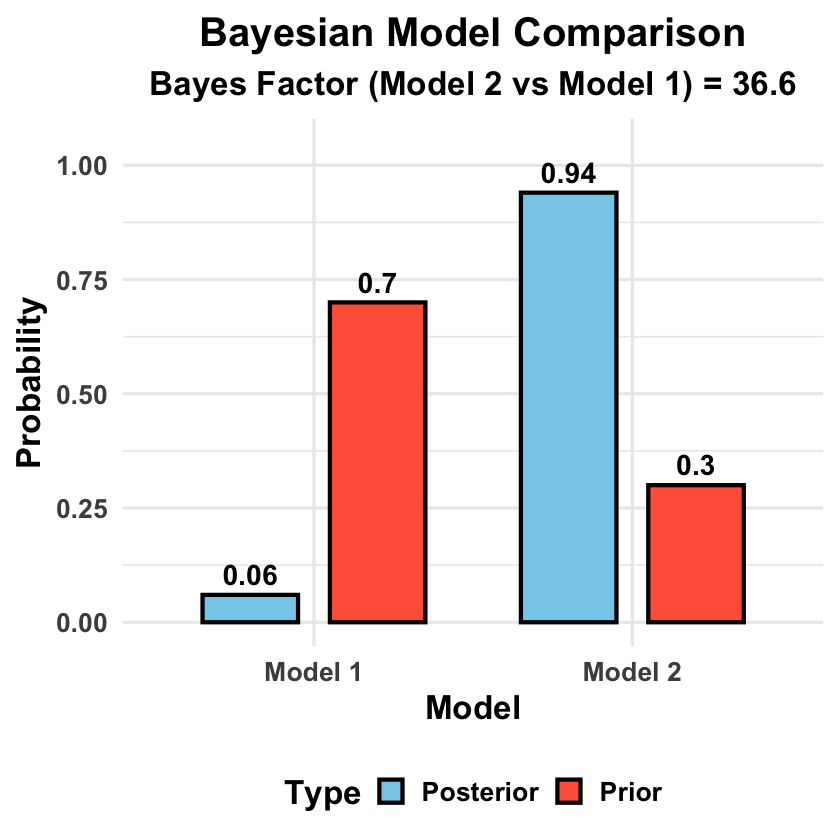

In [ ]:
library(ggplot2)

# Basic model comparison data with unequal priors
model_data <- data.frame(
 Model = c("Model 1", "Model 2"),
 Log_Marginal_Likelihood = c(-152.3, -148.7),
 Prior_Probability = c(0.7, 0.3)  # Higher prior for Model 1
)

# Compute Bayes factor and posterior probabilities
bayes_factor <- exp(model_data$Log_Marginal_Likelihood[2] - model_data$Log_Marginal_Likelihood[1])
unnormalized_posteriors <- exp(model_data$Log_Marginal_Likelihood) * model_data$Prior_Probability
posterior_probs <- unnormalized_posteriors / sum(unnormalized_posteriors)

# Create plotting data
plot_data <- data.frame(
 Model = rep(c("Model 1", "Model 2"), 2),
 Probability = c(model_data$Prior_Probability, posterior_probs),
 Type = rep(c("Prior", "Posterior"), each = 2)
)

# Create barplot
p <- ggplot(plot_data, aes(x = Model, y = Probability, fill = Type)) +
 geom_col(position = position_dodge(width = 0.8), width = 0.6, color = "black", linewidth = 1.2) +
 geom_text(aes(label = round(Probability, 3)), 
           position = position_dodge(width = 0.8), vjust = -0.5, size = 6, fontface = "bold") +
 scale_fill_manual(values = c("Prior" = "tomato", "Posterior" = "skyblue")) +
 labs(
   title = "Bayesian Model Comparison",
   subtitle = paste("Bayes Factor (Model 2 vs Model 1) =", round(bayes_factor, 2)),
   y = "Probability",
   x = "Model",
   fill = "Type"
 ) +
 ylim(0, 1.05) +
 theme_minimal(base_size = 20) +
 theme(
   plot.title = element_text(hjust = 0.5, face = "bold"),
   plot.subtitle = element_text(hjust = 0.5, face = "bold"),
   axis.title.y = element_text(face = "bold"),
   axis.title.x = element_text(face = "bold"),
   axis.text.x = element_text(face = "bold"),
   axis.text.y = element_text(face = "bold"),
   legend.title = element_text(face = "bold"),
   legend.text = element_text(face = "bold"),
   legend.position = "bottom"
 )

print(p)

# Save the plot
ggsave("./cartoons/Bayesian_model_comparison.png", plot = p,
      width = 10, height = 6, 
      bg = "transparent",
      dpi = 300)